# DBSCAN

In [1]:
# ############################################################
# This code is from following the linked example below
# - https://youtu.be/2eDFjw456AM
# - https://github.com/siddiquiamir/Python-Clustering-Tutorials/blob/main/DBSCAN.ipynb
# ############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Mall_customers.csv")

In [3]:
df.head()

,1,Male,19,15,39
0,2,Male,21,15,81
1,3,Female,20,16,6
2,4,Female,23,16,77
3,5,Female,31,17,40
4,6,Female,22,17,76


In [4]:
df.tail()

,1,Male,19,15,39
194,196,Female,35,120,79
195,197,Female,45,126,28
196,198,Male,32,126,74
197,199,Male,32,137,18
198,200,Male,30,137,83


In [5]:
df.shape

(199, 5)

In [6]:
df = df.iloc[:, [3,4]].values

In [7]:
df

array([[ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,  54],
       [ 43,

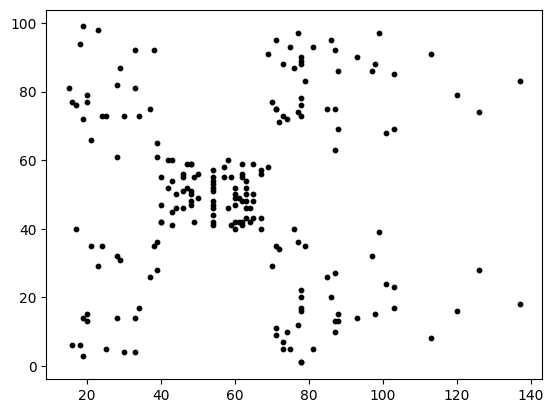

In [8]:
plt.scatter(df[:,0], df[:,1], s=10, c= "black")

In [9]:
from sklearn.cluster import KMeans

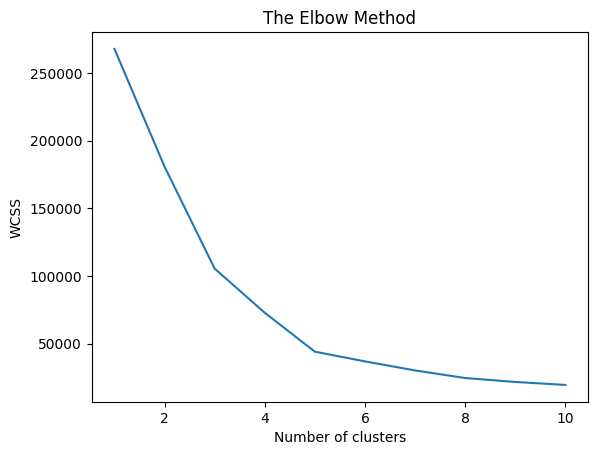

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [13]:
labels = dbscan.fit_predict(df)

In [14]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

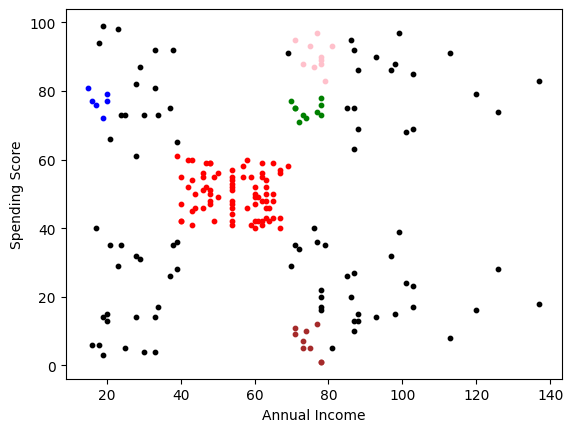

In [15]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()